In [1]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn import metrics

- Read data

In [3]:
df = pd.read_csv("datacum.csv", skip_blank_lines=True, comment="#")


- Add column's name

In [4]:
columns = ["ID", "Type", "Clump-thickness", "Cell-size", "Cell-shape", "Marginal-adhension", "epithlial-cell-size", "Bare-nuclei", "Bland-chromatin","Normal-nuclei", "Mitoses"]
df.columns = columns
df

,ID,Type,Clump-thickness,Cell-size,Cell-shape,Marginal-adhension,epithlial-cell-size,Bare-nuclei,Bland-chromatin,Normal-nuclei,Mitoses
0,1002945,2,5,4,4,5,7,10,3,2,1
1,1015425,2,3,1,1,1,2,2,3,1,1
2,1016277,2,6,8,8,1,3,4,3,7,1
3,1017023,2,4,1,1,3,2,1,3,1,1
4,1017122,4,8,10,10,8,7,10,9,7,1
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,2,3,1,1,1,3,2,1,1,1
694,841769,2,2,1,1,1,2,1,1,1,1
695,888820,4,5,10,10,3,7,3,8,10,2
696,897471,4,4,8,6,4,3,4,10,6,1


- Create test data

In [6]:
np.random.seed(1)

benigns_idxs = np.where(df["Type"] == 2)[0]
maligns_idxs = np.where(df["Type"] == 4)[0]

random_idx1 = np.random.choice(benigns_idxs, size=80)

random_idx2 = np.random.choice(maligns_idxs, size = 40)


random_idxs = np.hstack([random_idx1, random_idx2])
random_idxs.sort()


test_data = pd.DataFrame(df.iloc[random_idxs], columns= columns)
test_data


,ID,Type,Clump-thickness,Cell-size,Cell-shape,Marginal-adhension,epithlial-cell-size,Bare-nuclei,Bland-chromatin,Normal-nuclei,Mitoses
1,1015425,2,3,1,1,1,2,2,3,1,1
3,1017023,2,4,1,1,3,2,1,3,1,1
8,1033078,2,4,2,1,1,2,1,2,1,1
13,1044572,4,8,7,5,10,7,9,5,5,4
14,1047630,4,7,4,6,4,6,1,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...
685,536708,2,1,1,1,1,2,1,1,1,1
689,654546,2,1,1,1,3,2,1,1,1,1
692,763235,2,3,1,1,1,2,1,2,1,2
694,841769,2,2,1,1,1,2,1,1,1,1


- Create train data

In [7]:
train_data = df[~df.index.isin(random_idxs)]
train_data

,ID,Type,Clump-thickness,Cell-size,Cell-shape,Marginal-adhension,epithlial-cell-size,Bare-nuclei,Bland-chromatin,Normal-nuclei,Mitoses
0,1002945,2,5,4,4,5,7,10,3,2,1
2,1016277,2,6,8,8,1,3,4,3,7,1
4,1017122,4,8,10,10,8,7,10,9,7,1
5,1018099,2,1,1,1,1,2,10,3,1,1
6,1018561,2,2,1,2,1,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
690,695091,4,5,10,10,5,4,5,4,4,1
691,714039,2,3,1,1,1,2,1,1,1,1
693,776715,2,3,1,1,1,3,2,1,1,1
695,888820,4,5,10,10,3,7,3,8,10,2


- Create labels

In [8]:
train_labels = train_data["Type"]
train_labels = train_labels.to_numpy()

test_labels = test_data["Type"]
test_labels = test_labels.to_numpy()

- Remove unccessary columns

In [9]:
train_data = train_data.drop(columns=["Type", "ID"])
train_data = train_data.to_numpy()

test_data = test_data.drop(columns=["Type", "ID"])
test_data = test_data.to_numpy()

- Create ML model

In [11]:
classifier = GaussianNB(priors=None)
classifier.fit(train_data, train_labels)

GaussianNB()

- predict

In [12]:
predict_results = classifier.predict(test_data)
predict_results

array([2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4], dtype=int64)

- actual result

In [13]:
test_labels

array([2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2,
       4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4], dtype=int64)

- create confusion matrix

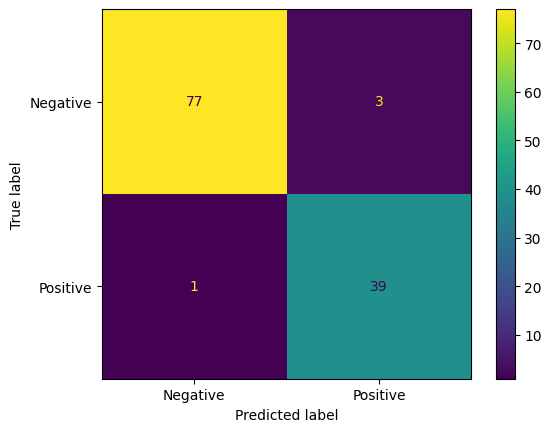

In [14]:
confusion_matrix = metrics.confusion_matrix(test_labels, predict_results)
metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=["Negative", "Positive"]).plot()

In [15]:
f_negative = confusion_matrix[1][0]
f_positive = confusion_matrix[0][1]
t_negative = confusion_matrix[0][0]
t_positive = confusion_matrix[1][1]

total = f_negative + f_positive + t_negative + t_positive

print(f"True negative: {t_negative}")
print(f"True positive: {t_positive}")
print(f"False negative: {f_negative}")
print(f"False positive: {f_positive}")


accuracy = (t_positive + t_negative)/total
precision = t_positive/(t_positive + f_positive)
sensitivity = t_positive/(t_positive + f_negative)

True negative: 77
True positive: 39
False negative: 1
False positive: 3


In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"callback: {sensitivity}")

: 